# TP assembleur

À partir de la combinaison d’instructions simples, il est possible de construire des programmes très évolués. 

## Problème  
Déterminer les instructions minimales nécessaires pour construire un programme.  

## Sommaire
1. Instructions  
    1.1 Rupture de séquence  
    1.2 Entrées / Sorties
2. Calcul de moyenne  
    2.1 Cahier des charges  
    2.2 Répéter une instruction  
    2.3 Effectuer une division  
    2.4 Implémentation du programme  


## Instructions  
### Rupture de séquence  
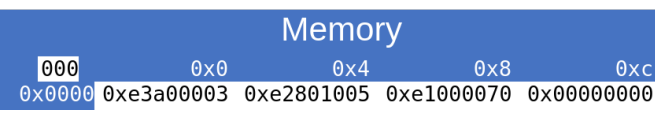  


_Quand l’exécution d’une instruction est terminée, le processeur lit celle du mot-mémoire suivant : L’exécution est **séquentielle**_  


***
<i class="fa-fw fas fa-volume-up">&nbsp;**À&nbsp;retenir**</i>
> Un programme doit pouvoir agir de plusieurs manières différentes selon les résultats obtenus. On parle de **rupture de séquence**
***  

#### Activité 1
##### Consigne
1. Tester le code ci dessous **en mode pas à pas**. Prendre le temps de bien comprendre le saut.  
2. Dans le code remplacer la valeur dans le registre R1 par 11. Observer alors l’exécution du code.  
3. Le HALT en ligne 8 est-il utile ?  
4. Dans la documentation, trouver les différents sauts (branchements) possibles.

```assembleur
1    MOV R0, #10
2    MOV R1, #10
3    // Compare les valeurs de R0 et R1
4    CMP R0, R1
5    // Si les valeurs sont égales, saute à la ligne labelegal
6    BEQ labelegal
7    MOV R2, R0
8    HALT
9  labelegal:
10     STR R0, mavaleur
11     HALT
12 mavaleur: 5


````


##### Correction   
Avant de regarder la correction    

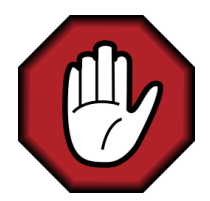  

- Prendre le temps de réfléchir,  
- Analyser les messages d’erreur,  
- Demander au professeur.  
    
<details>  
<summary> <b>Cliquez ici pour afficher la solution</b>   </summary>  
  
- Si R0 = R1 (ligne 4), l’instruction BEQ en ligne 6 effectue un saut jusqu’à la ligne 9. **Le code des lignes  7 et 8 n’est pas exécuté**.  
- Si les valeurs de R0 et R1 ne sont pas égales, BEQ ne fait rien et la ligne 7 sera la prochaine exécutée.
- Le **HALT** en ligne 8 est indispensable, sinon les lignes 9, 10, 11 seront exécutées dans tous les cas.  
- Dans la documentation en pages 7-8 on trouve :  
    - **B** : unconditional branch,  
    - **BNE** : Branch if Not Equal,  
    - **BLT** : Branch if Less Than,  
    - **BGT** : Branch if Greater Than.  
</details>  


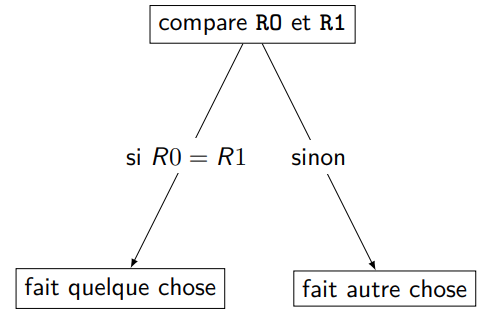  

_Structure conditionnelle_

***
<i class="fa-fw fas fa-volume-up">&nbsp;**À&nbsp;retenir**</i>
>Quand le programme effectue une comparaison, il y a deux réponses possibles qui correspondent à deux points de programme différents.
***  

#### Activité 2  
##### Consigne
1. Stocker deux valeurs dans la mémoire, avec les étiquettes **val1, val2**.  
2. Étiqueter un emplacement mémoire **resultat** et lui donner la valeur 0.  
3. Écrire un programme qui compare les valeurs dans **val1 et val2** et stocke **la plus grande valeur** dans l’emplacement **resultat**.  

##### Correction   
Avant de regarder la correction    

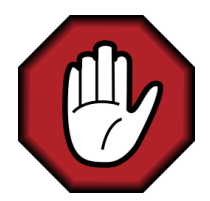  

- Prendre le temps de réfléchir,  
- Analyser les messages d’erreur,  
- Demander au professeur.  
    
<details>  
<summary> <b>Cliquez ici pour afficher la solution</b>   </summary>  
  
_Une réponse possible_
    
```assembleur
1   LDR R1,val1
2   LDR R2,val2
3   CMP R1,R2
4   BGT v1plusgrand //R1 est le plus grand
5   // R2 est le plus grand
6   STR R2,resultat
7   HALT
8 v1plusgrand:
9   STR R1,resultat
10   HALT
11 val1: 13
12 val2: 5
13 resultat: 0


````
</details>  


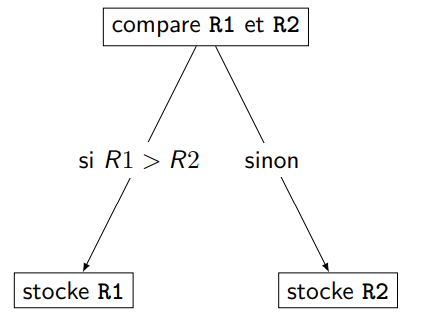  

_Structure conditionnelle_

### Entrées / Sorties
Les programmes réalisés jusqu’à présent n’interagissent pas avec l’utilisateur. Il n’y a eu que des échanges entre la mémoire vive et les registres.


***
<i class="fa-fw fas fa-volume-up">&nbsp;**À&nbsp;retenir**</i>
> Dans le modèle de von Neumann, pour communiquer avec l’utilisateur l’ordinateur utilise des interfaces d’entrée (clavier, …) et de sortie (écran, …).
***  

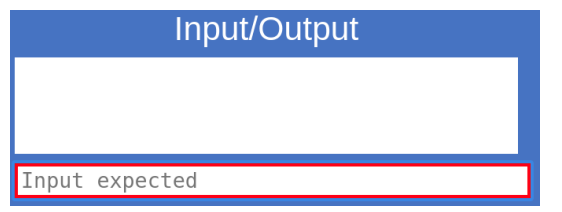  

_Dans le simulateur, le premier cadre représente la sortie écran et le second l’entrée clavier._  



#### Charger une entrée utilisateur

```assembleur
1 // charge une entrée clavier (un nombre) dans R0
2 LDR R0, .InputNum
3 HALT

````

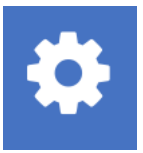  

_La roue tourne : l’ordinateur attend l’entrée d’un nombre (et la validation) pour poursuivre l’exécution._


#### Affichage d’un texte dans la sortie

```assembleur
1 // Copie du texte GAGNE dans R2
2 MOV R2,#GAGNE
3 // affiche dans la console de sortie
4 STR R2, .WriteString
5 HALT
6 GAGNE:.ASCIZ "Bien joué!"
````

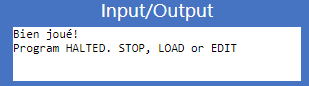  

_Affichage d’un texte dans la sortie._


#### Activité 3  
##### Consigne
Écrire un programme qui :   
-  demande à l’utilisateur un nombre entre 1 et 10,  
- le compare à un nombre préalablement chargé dans le registre R1, par le programmeur,  
  affiche _Bravo_ si l’utilisateur trouve le bon nombre,  
- affiche _Perdu_ sinon.   

##### Correction   
Avant de regarder la correction    

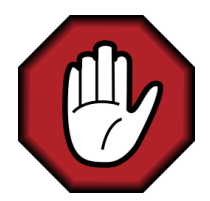  

- Prendre le temps de réfléchir,  
- Analyser les messages d’erreur,  
- Demander au professeur.  
    
<details>  
<summary> <b>Cliquez ici pour afficher la solution</b>   </summary>  
  
_Une réponse possible_
    
```assembleur
1    LDR R0,.InputNum // Copie d'une entrée clavier dans R0  
2    MOV R1,#10 // Charge 10 dans R1  
3    CMP R0,R1 // Compare RO et R1  
4    BNE NOTEGAL // S'il n'y a pas égalité, aller au label NOTEGAL  
5    MOV R2,#GAGNE // Copie du texte GAGNE dans R2  
6    B FIN // Aller au label FIN  
7 NOTEGAL:  
8    MOV R2,#PERDU  
9 FIN:  
10    STR R2,.WriteString // Affiche R2 dans la sortie  
11    HALT  
12 GAGNE: .ASCIZ "Bien joué!"  
13 PERDU: .ASCIZ "Perdu!"  


````
</details>  


## Calcul de moyenne

## Cahier des charges  
Pour faciliter le travail des enseignants, on se propose de construire un programme qui permet de calculer la moyenne des notes d’un élève.  
  
Le programme devra :  
- demander à l’utilisateur de rentrer huit notes,  
- calculer la somme des notes,  
- calculer la moyenne,  
- afficher la moyenne.  


Une stratégie pour répéter une instruction consiste à créer un compteur que l’on incrémentera et comparera à une valeur limite
    
```assembleur
1    MOV R11,#0 //initialise compteur
2 boucle:
3    ADD R11,R11,#1 //incrémente compteur
4    CMP R11,#3 //vérifie fin de la boucle
5    BNE boucle
6    HALT //sortie de la boucle

````
_La boucle effectue 3 tours_


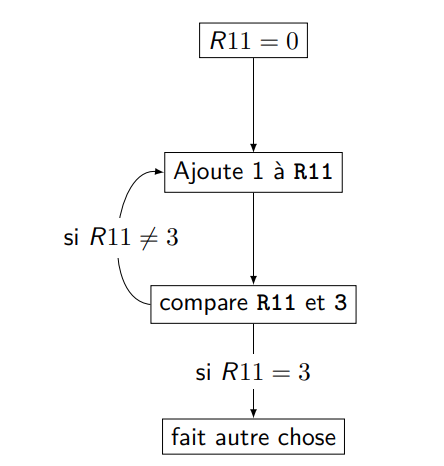  


### Effectuer une division


#### Activité 4  
##### Consigne
1. Écrire et exécuter le code suivant :
```assembleur
1 MOV R0,#16
2 LSR R1, R0,#1
3 LSR R2, R0,#2
4 LSR R3, R0,#3
5 HALT
````
2. Comprendre le fonctionnement de l’instruction LSR.



##### Correction   
Avant de regarder la correction    

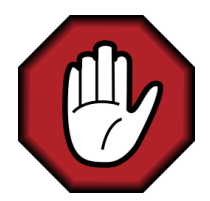  

- Prendre le temps de réfléchir,  
- Analyser les messages d’erreur,  
- Demander au professeur.  
    
<details>  
<summary> <b>Cliquez ici pour afficher la solution</b>   </summary>  

- L’instruction LSR effectue des divisions successives par 2
    
```assembleur
LSR R3, R0,#3
````
  
La valeur #3 indique le nombre de division par 2  
</details>  


### Implémentation du programme

#### Activité 5  
##### Consigne
En s’aidant des instructions présentées précédemment, construire le programme de la moyenne,
présenté dans le cahier des charges.


##### Correction   
Avant de regarder la correction    

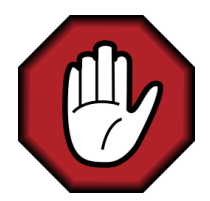  

- Prendre le temps de réfléchir,  
- Analyser les messages d’erreur,  
- Demander au professeur.  
    
<details>  
<summary> <b>Cliquez ici pour afficher la solution</b>   </summary>  

- L’instruction LSR effectue des divisions successives par 2
    
```assembleur
1    MOV R0,#0 //somme des notes
2    MOV R12,#8 //nombre de notes
3    MOV R11,#0 //compteur
4 bouclenote:
5    LDR R1,.InputNum
6    ADD R0,R0,R1 //ajoute note
7    ADD R11,R11,#1 //incrémente compteur
8    CMP R11,R12 //fin de boucle?
9    BNE bouclenote
10   LSR R0,R0,#3 //calcule moyenne
11   STR R0,.WriteUnsignedNum
12   HALT

````

</details>  

_Une solution possible_